In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, eig, norm
from time import time
import pandas as pd
import nbconvert

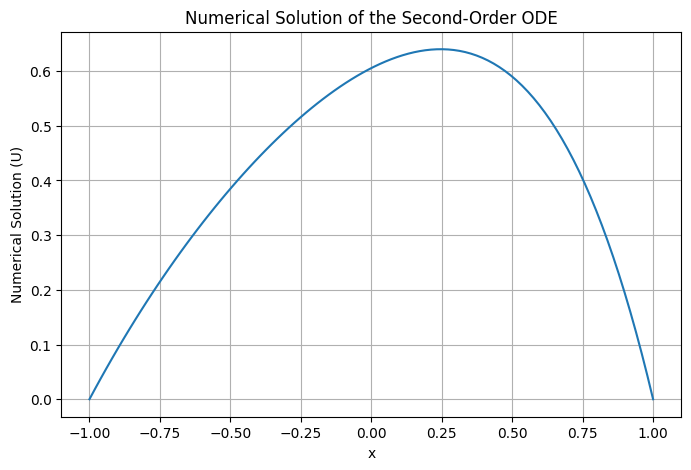

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
alpha1 = 1
alpha2 = 0
beta1 = 1
beta2 = 0
alpha = 0
beta = 0
N = 100  # Количество узлов
h = 2 / (N)  # Шаг сетки
x_h = np.linspace(-1, 1, N)  # Равномерная сетка

# Определение функций a(x), c(x) и f(x)
def a(x):
    return 1 / (2 + x)

def c(x):
    return np.cos(x)

def f(x):
    return 1 + x

K1 = np.zeros(N)
K2 = np.zeros(N)
K3 = np.zeros(N)
F = np.zeros(N)

# Вычисление коэффициентов K1, K2, K3 и F на сетке
for i in range(N):
    x_i = x_h[i]
    K3[i] = -1 * a(x_i - h/2)/h +  c(x_i - h/2)* h / 6
    K2[i] = (a(x_i - h/2) + a(x_i + h/2)) / h + (c(x_i - h/2) + c(x_i + h/2)) * h / 3
    K1[i] = -1  * a(x_i + h/2) / h +  c(x_i + h/2)* h / 6
    F[i] = h / 2 * (f(x_i + h/2)+f(x_i - h/2))

# Инициализация массивов alpha и beta
S = np.zeros(N)
T = np.zeros(N)

S[0] = alpha2 / (h * alpha1 + alpha2)
T[0] = alpha * h / (h * alpha1 + alpha2)

for i in range(1, N):
    S[i] = -K3[i-1] / (K2[i-1] + S[i-1] * K1[i-1])
    T[i] = -(K1[i-1] * T[i-1] - F[i-1]) / (K2[i-1] + S[i-1] * K1[i-1])


# Инициализация массива u_prog
u_prog = np.zeros(N)


u_prog[N-1] = (beta2 * T[N-1] + h * beta) / (h * beta1 + beta2 - beta2 * S[N-1])  # Заданное граничное условие
for i in range(N-2, -1, -1):
    u_prog[i] = S[i] * u_prog[i+1] + T[i]

# Вывод графика численного решения
plt.figure(figsize=(8, 5))
plt.plot(x_h, u_prog)
plt.xlabel('x')
plt.ylabel('Numerical Solution (U)')
plt.title('Numerical Solution of the Second-Order ODE')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
a = -1
b = 1
alpha1 = 1
alpha2 = 0
beta1 = 1
beta2 = 0
alpha = 0
beta = 0
N = 100  # Количество узлов
h = 2 / N  # Шаг сетки
x_h = np.linspace(-1, 1, N)  # Равномерная сетка

# Определение функций a(x), c(x) и f(x)
def a(x):
    return 1 / (2 + x)

def c(x):
    return np.cos(x)

def f(x):
    return 1 + x

K1 = np.zeros(N)
K2 = np.zeros(N)
K3 = np.zeros(N)
F = np.zeros(N)

# Вычисление коэффициентов K1, K2, K3 и F на сетке
for i in range(N):
    x_i = x_h[i]
    K3[i] = -1 * a(x_i - h/2)/h +  c(x_i - h/2)* h / 6
    K2[i] = (a(x_i - h/2) + a(x_i + h/2)) / h + (c(x_i - h/2) + c(x_i + h/2)) * h / 3
    K1[i] = -1  * a(x_i + h/2) / h +  c(x_i + h/2)* h / 6
    F[i] = h / 2 * (f(x_i + h/2)+f(x_i - h/2))

S = np.zeros(N)
T = np.zeros(N)

S[0] = alpha2 / (h * alpha1 + alpha2)
T[0] = alpha * h / (h * alpha1 + alpha2)

for i in range(N - 1):
    S[i + 1] = -K3[i] / (K2[i] + K1[i] * S[i])
    T[i + 1] = -(K1[i] * T[i] - F[i]) / (K2[i] + K1[i] * S[i])

Y1 = np.zeros(N + 1)
Y1[N] = (beta2 * T[N - 1] + h * beta) / (h * beta1 + beta2 - beta2 * S[N - 1])

for i in reversed(range(1, N)):
    Y1[i] = S[i - 1] * Y1[i + 1] + T[i - 1]

u_k = np.zeros(N)
u_k1 = np.zeros(N)
err = np.inf
K = np.zeros((N-1, N-1))
K[0, 0] = K2[0]
K[0, 1] = K3[0]
for i in range(1, N-2):
  K[i][i - 1] = K1[i]
  K[i][i] = K2[i]
  K[i][i+1] = K3[i]
K[-1][-2] = K1[-1]
K[-1][-1] = K2[-1]

D = np.diag(np.diag(K))
D_inv = inv(D)
val, vec = eig(np.dot(D_inv, K))
lamda_min = val[0]
lamda_max = val[-1]
sigma = 2/(lamda_max + lamda_min)
while err > 0.00001:
  u_k1[0] = u_k[0] - sigma/K2[0]*(K2[0]*u_k[0] + K3[0]*u_k[1] - F[0])
  for i in range(1, N - 2):
    u_k1[i] = u_k[i] - sigma/K2[i]*(K1[i]*u_k[i-1] + K2[i]*u_k[i] + K3[i]*u_k[i+1] - F[i])
  u_k1[N-2] = u_k[N-2] - sigma/K2[N-2]*(K1[N-2]*u_k[N-3] + K2[N-2]*u_k[N-2] - F[N-2])
  err = norm(u_k - u_k1)
  u_k = u_k1.copy()
Y2 = np.zeros(N)
Y2[:]= u_k

#Декомпозиция
(N,) = K1.shape
n = int(np.sqrt(N))
u_n = np.zeros(N)
u_o = np.zeros(N)
s = 1
while True:
  for i in range(0, N - 2 * n + 2, n-1):
    z = np.zeros(2 * n - 1)
    if i == 0:
      z[0] = s*(K2[i] * u_o[i] + K3[i] * u_o[i + 1] - F[i])
      z[2*n-2] = s * (K1[i+2*n-2] * u_o[i+2*n-3] + K2[i+2*n-2]*u_o[i+2*n-2] + K3[i+2*n-2]*u_o[i+2*n-1] - F[i+2*n-2])
    if i == N-2 * n+1:
      z[0] = s*(K1[i]*u_o[i-1]+ K2[i]*u_o[i]+K3[i]*u_o[i+1]-F[i])
      z[2*n-2] = s * (K1[i+2*n-2] * u_o[i+2*n-3] + K2[i+2*n-2]*u_o[i+2*n-2] - F[i+2*n-2])
    else:
      z[0] = s*(K1[i]*u_o[i-1]+ K2[i]*u_o[i]+K3[i]*u_o[i+1]-F[i])
      z[2*n-2] = s * (K1[i+2*n-2] * u_o[i+2*n-3] + K2[i+2*n-2]*u_o[i+2*n-2] + K3[i+2*n-2]*u_o[i+2*n-1] - F[i+2*n-2])
    for j in range(i+1, i+2*n-2):
      z[j-i] = s*(K1[j]* u_o[j-1]+ K2[j]*u_o[j]+K3[j]* u_o[j+1] - F[j])
      u_o[i:i+2*n-1] -= np.array(TMA(K1[i:i+2*n-1],K2[i:i+2*n-1],K3[i:i+2*n-1],z))
  if np.max(np.abs(u_n - u_o)) > 0.00001:
    u_n = u_o.copy()
  else:
    break
print(u_n)

  #   S = np.zeros(2 * n)
  #   T = np.zeros(2 * n)
  #   S[0] = alpha2 / (h * alpha1 + alpha2)
  #   T[0] = alpha * h / (h * alpha1 + alpha2)
  # for j in range(2 * n - 1):
  #     S[i + 1] = -K3[j + i] / (K2[j + i] + K1[j + i] * S[i])
  #     T[i + 1] = -(K1[j + i] * T[i] - z[i]) / (K2[j + i] + K1[j + i] * S[i])
  # W = np.zeros(2 * n + 1)
  # W[2 * n] = (beta2 * T[2 * n - 1] + h * beta) / (h * beta1 + beta2 - beta2 * S[2 * n - 1])
  # for k in reversed(range(1, 2 * n)):
  #   W[k - 1] = S[k - 1] * W[k] + T[k - 1]
  #   u_k1[i + 1:i + 2 * n] = u_k1[k+ 1:i + 2 * n] - W[1:2 * n]

  #   err = np.linalg.norm(u_k - u_k1)
  #   u_k = np.copy(u_k1)

  # S = np.zeros(n*2)
  # T = np.zeros(n*2)
  # S[0] = alpha2 / (h * alpha1 + alpha2)
  # T[0] = alpha * h / (h * alpha1 + alpha2)
  # for i in range(2*n - 1):
  #     S[i + 1] = -K3[i] / (K2[i] + K1[i] * S[i])
  #     T[i + 1] = -(K1[i] * T[i] - z[i]) / (K2[i] + K1[i] * S[i])
  # Y3= np.zeros(2*n + 2)
  # Y3[2*n + 1] = (beta2 * T[2*n + 1] + h * beta) / (h * beta1 + beta2 - beta2 * S[2*n + 1])  # Заданное граничное условие
  # for i in range(2*n-2, -1, -1):
  #   Y3[i] = S[i] * Y3[i+1] + T[i]
  #   U_K = U_K - Y3


[-4.44089861e+298 -1.52581053e+298 -1.31058097e+298  4.60533856e+297
 -2.56078772e+298  4.66807681e+298 -1.06325338e+299  2.17998993e+299
 -4.42324303e+299  8.01875856e+301  1.97583510e+302 -2.13799775e+302
  3.93304903e+302 -5.15492754e+302  5.92149802e+302 -4.48855088e+302
  1.89231776e+301  5.26123190e+302  1.22161305e+304  2.13061101e+303
  4.59391620e+302  1.58999498e+303 -8.95890928e+302  1.72942258e+303
 -9.56354375e+302  1.54139055e+302  1.38644406e+303  3.06007654e+304
  5.07606026e+303  1.61631414e+303  3.32487017e+303 -1.26464321e+303
  3.28750692e+303 -1.55954533e+303  3.66818424e+302  2.53058713e+303
  5.45930122e+304  8.90325606e+303  3.19720978e+303  5.52327989e+303
 -1.61968501e+303  5.20521390e+303 -2.24312116e+303  6.46115098e+302
  3.91708023e+303  8.33776614e+304  1.34961175e+304  5.12957038e+303
  8.14081102e+303 -1.99133640e+303  7.46465951e+303 -3.02064656e+303
  9.83836040e+302  5.54170861e+303  1.16971204e+305  1.88559826e+304
  7.40545119e+303  1.11839560e+304

<ipython-input-39-5939dd81492c>:98: RuntimeWarning: overflow encountered in double_scalars
  z[0] = s*(K1[i]*u_o[i-1]+ K2[i]*u_o[i]+K3[i]*u_o[i+1]-F[i])
<ipython-input-13-81175019d6ba>:11: RuntimeWarning: invalid value encountered in double_scalars
  t[i-1] = s[i-1]*t[i]+t[i-1]


In [ ]:
import numpy as np
alpha1 = 1
alpha2 = 0
beta1 = 1
beta2 = 0
alpha = 0
beta = 0
N = 100  # Количество узлов
h = 2 / N  # Шаг сетки
x_h = np.linspace(-1, 1, N)  # Равномерная сетка

# Определение функций a(x), c(x) и f(x)
def a(x):
    return 1 / (2 + x)

def c(x):
    return np.cos(x)

def f(x):
    return 1 + x

K1 = np.zeros(N)
K2 = np.zeros(N)
K3 = np.zeros(N)
F = np.zeros(N)

# Вычисление коэффициентов K1, K2, K3 и F на сетке
for i in range(N):
    x_i = x_h[i]
    K3[i] = -1 * a(x_i - h/2)/h +  c(x_i - h/2)* h / 6
    K2[i] = (a(x_i - h/2) + a(x_i + h/2)) / h + (c(x_i - h/2) + c(x_i + h/2)) * h / 3
    K1[i] = -1  * a(x_i + h/2) / h +  c(x_i + h/2)* h / 6
    F[i] = h / 2 * (f(x_i + h/2)+f(x_i - h/2))
(N,) = K1.shape
n = int(np.sqrt(N))
u_n = np.zeros(N)
u_o = np.zeros(N)
s = 0.1
while True:
  for i in range(0, N - 2 * n + 2, n-1):
    z = np.zeros(2 * n - 1)
    if i == 0:
      z[0] = s*(K2[i] * u_o[i] + K3[i] * u_o[i + 1] - F[i])
      z[2*n-2] = s * (K1[i+2*n-2] * u_o[i+2*n-3] + K2[i+2*n-2]*u_o[i+2*n-2] + K3[i+2*n-2]*u_o[i+2*n-1] - F[i+2*n-2])
    if i == N-2 * n+1:
      z[0] = s*(K1[i]*u_o[i-1]+ K2[i]*u_o[i]+K3[i]*u_o[i+1]-F[i])
      z[2*n-2] = s * (K1[i+2*n-2] * u_o[i+2*n-3] + K2[i+2*n-2]*u_o[i+2*n-2] - F[i+2*n-2])
    else:
      z[0] = s*(K1[i]*u_o[i-1]+ K2[i]*u_o[i]+K3[i]*u_o[i+1]-F[i])
      z[2*n-2] = s * (K1[i+2*n-2] * u_o[i+2*n-3] + K2[i+2*n-2]*u_o[i+2*n-2] + K3[i+2*n-2]*u_o[i+2*n-1] - F[i+2*n-2])
    for j in range(i+1, i+2*n-2):
      z[j-i] = s*(K1[j]* u_o[j-1]+ K2[j]*u_o[j]+K3[j]* u_o[j+1] - F[j])
      u_o[i:i+2*n -1] -= np.array(TMA(K1[i:i+2*n-1],K2[i:i+2*n-1],K3[i:i+2*n-1],z))
  if np.max(np.abs(u_n - u_o)) > 0.0001:
    u_n = u_o.copy()
  else:
    break
print(u_n)

[0.05897051 0.07435427 0.08946812 0.10432542 0.1189397  0.13332474
 0.14749474 0.16146463 0.17525039 0.18883093 0.20214177 0.21524882
 0.2281587  0.24087981 0.25342425 0.26580091 0.278033   0.29011817
 0.30207806 0.31376764 0.32528728 0.33663851 0.34782764 0.35886558
 0.36975936 0.38053332 0.39118035 0.40172245 0.41197785 0.42206481
 0.43198151 0.44173185 0.4513246  0.46076429 0.4700739  0.47924224
 0.48828932 0.49701469 0.50554219 0.51386625 0.52198726 0.52991033
 0.53763616 0.54518359 0.55253713 0.55971207 0.56650423 0.5730317
 0.57928414 0.58525685 0.59094927 0.59635649 0.60149014 0.6063296
 0.61088249 0.61495236 0.61864171 0.62193383 0.62481692 0.62728246
 0.62931779 0.63092419 0.63207454 0.63276578 0.63281749 0.63230819
 0.63121292 0.62951058 0.6271823  0.62420544 0.62056799 0.61623474
 0.61118916 0.60527266 0.59853303 0.59093539 0.58244737 0.5730378
 0.56267216 0.5513232  0.53894593 0.52550925 0.51087949 0.4950714
 0.47803663 0.45973402 0.44011453 0.41914052 0.39674969 0.37293223

In [ ]:
def TMA(a,b,c,g):
  (n,) = b.shape
  s = [None for i in range(n)]
  t = [None for i in range(n)]
  s[0] = -c[0]/b[0]
  t[0] = g[0]/b[0]
  for i in range(1,n):
    s[i] = c[i]/ (b[i]+a[i]*s[i-1])
    t[i] = (g[i]- a[i]*t[i-1])/(b[i]+a[i]*s[i-1])
  for i in range(n-1,0,-1):
    t[i-1] = s[i-1]*t[i]+t[i-1]
  return t

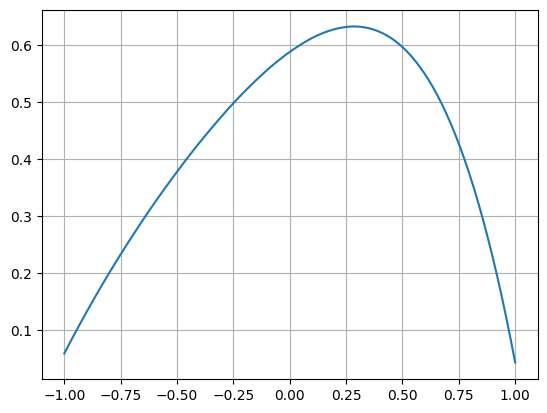

In [ ]:
plt.plot(x_h,u_n)
plt.grid('on')

In [ ]:
# alpha1 = 1
# alpha2 = 0
# beta1 = 1
# beta2 = 0
# alpha = 0
# beta = 0
# N = 600000  # Количество узлов
# h = 2 / (N)  # Шаг сетки
# x_h = np.linspace(-1, 1, N+1)  # Равномерная сетка

# # Определение функций a(x), c(x) и f(x)
# def a(x):
#     return 1 / (2 + x)

# def c(x):
#     return np.cos(x)

# def f(x):
#     return 1 + x

# K1 = np.zeros(N-1)
# K2 = np.zeros(N-1)
# K3 = np.zeros(N-1)
# F = np.zeros(N-1)
# for i in range(0, N-1):
#   x_i = (i+1) * h
#   K3[i] = -a(x_i - h/2)/h + c(x_i - h/2)* h / 6
#   K2[i] = (a(x_i - h/2) + a(x_i + h/2)) / h + (c(x_i - h/2) + c(x_i + h/2)) * h / 3
#   K1[i] = -a(x_i + h/2) / h + c(x_i + h/2)* h / 6
#   F[i] = h / 2 * (f(x_i + h/2)+f(x_i - h/2))
# S = np.zeros(N)
# T = np.zeros(N)
# S[0] = alpha2 / (h * alpha1 + alpha2)
# T[0] = alpha * h / (h * alpha1 + alpha2)
# for i in range(0, N-1):
#   S[i+1] = -K3[i] / (K2[i] + S[i] * K1[i])
#   T[i+1] = -(K1[i] * T[i] - F[i]) / (K2[i] + S[i] * K1[i])
# u_1 = np.zeros(N+1)
# u_1[-1] = (beta2 * T[N-1] + h * beta) / (h * beta1 + beta2 - beta2 * S[N-1])
# for i in range(N-1, -1, -1):
#   u_1[i] = S[i] * u_1[i+1] + T[i]
u_k = np.zeros(N)
u_k1 = np.zeros(N)
err = np.inf
K = np.zeros((N-1, N-1))
K[0, 0] = K2[0]
K[0, 1] = K3[0]
for i in range(1, N-2):
  K[i][i - 1] = K1[i]
  K[i][i] = K2[i]
  K[i][i+1] = K3[i]
K[-1][-2] = K1[-1]
K[-1][-1] = K2[-1]
D = np.diag(np.diag(K))
D_inv = inv(D)
val, vec = eig(np.dot(D_inv, K))
lamda_min = val[0]
lamda_max = val[-1]
sigma = 2/(lamda_max + lamda_min)
while err > 0.00001:
  u_k1[0] = u_k[0] - sigma/K2[0]*(K2[0]*u_k[0] + K3[0]*u_k[1] - F[0])
  for i in range(1, N - 2):
    u_k1[i] = u_k[i] - sigma/K2[i]*(K1[i]*u_k[i-1] + K2[i]*u_k[i] + K3[i]*u_k[i+1] - F[i])
  u_k1[N-2] = u_k[N-2] - sigma/K2[N-2]*(K1[N-2]*u_k[N-3] + K2[N-2]*u_k[N-2] - F[N-2])
  err = norm(u_k - u_k1)
  u_k = u_k1.copy()
u_2 = np.zeros(N)
u_2[:]= u_k

LinAlgError: Singular matrix

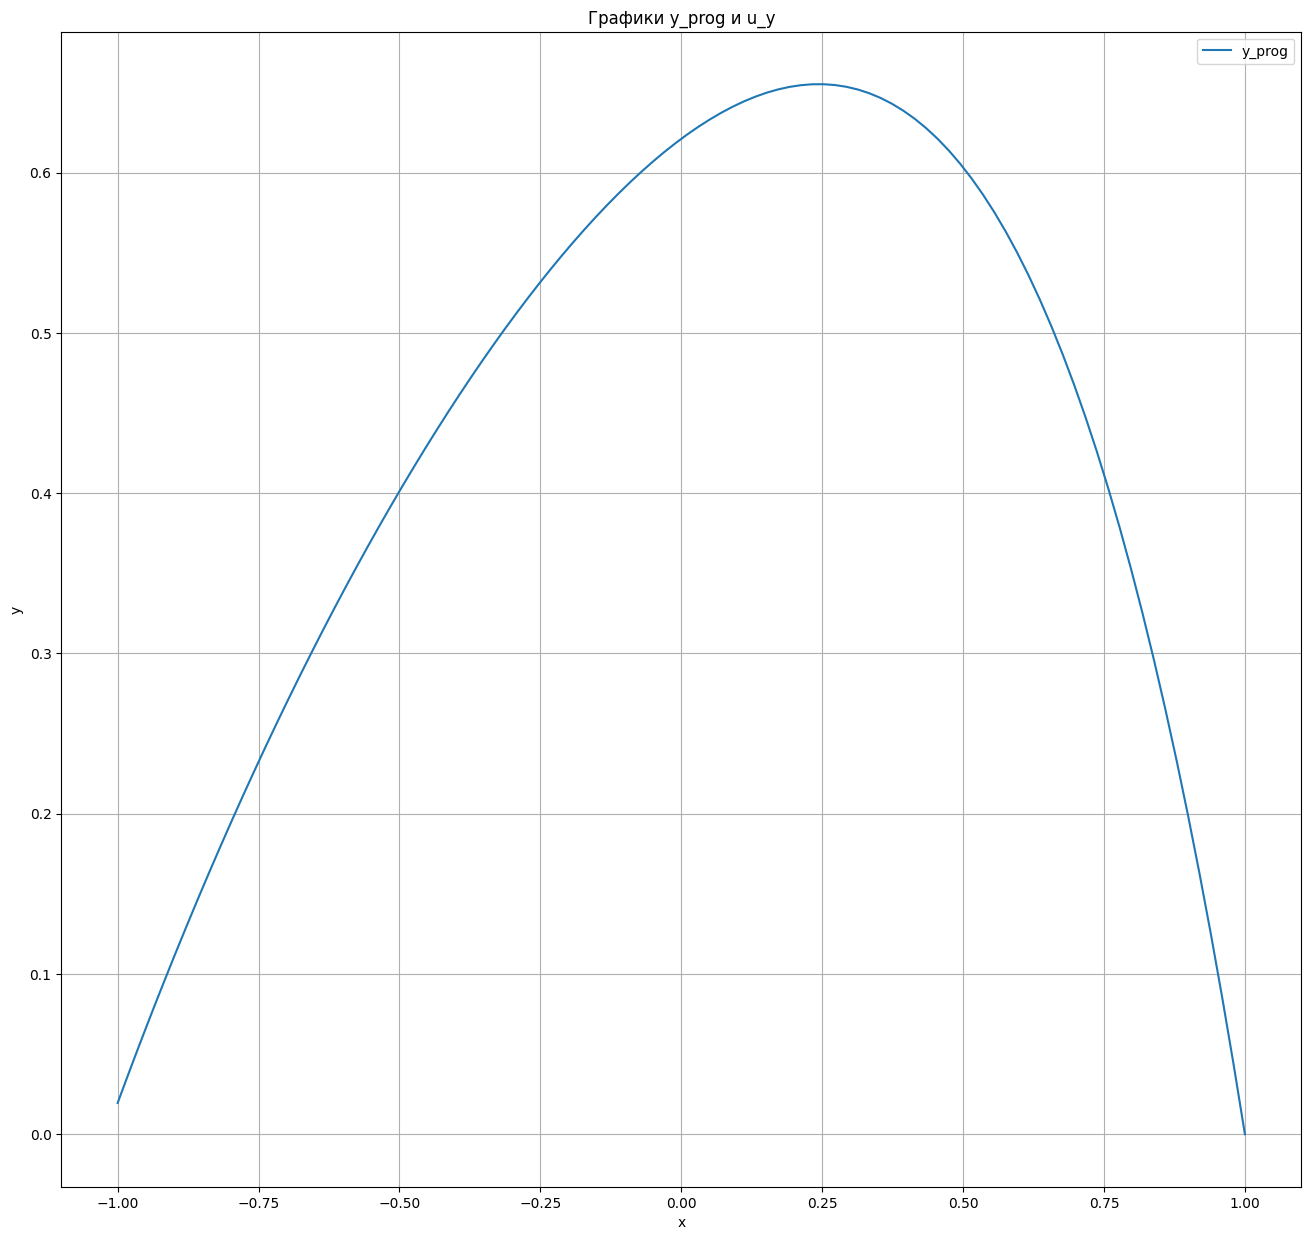

In [ ]:
plt.figure(figsize=(16, 15))
xh = np.linspace(-1, 1, N)
plt.plot(xh, u_2, label='y_prog')
# plt.plot(x_h, u_2, label='u_y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики y_prog и u_y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Given values
x_value = 0.8


# Find the index in the array x_h closest to the given x_value
index_x = np.argmin(np.abs(x_h - x_value))

# Evaluate the functions and arrays at x = -0.9
x_at_minus_0_9 = x_h[index_x]
u_at_minus_0_9 = u_prog[index_x]
K1_at_minus_0_9 = K1[index_x]
K2_at_minus_0_9 = K2[index_x]
K3_at_minus_0_9 = K3[index_x]
F_at_minus_0_9 = F[index_x]

# Print the results
print(f"At x = {x_at_minus_0_9}:")
print(f"u = {u_at_minus_0_9}")
print(f"K1 = {K1_at_minus_0_9}")
print(f"K2 = {K2_at_minus_0_9}")
print(f"K3 = {K3_at_minus_0_9}")
print(f"F = {F_at_minus_0_9}")


At x = 0.7999994444429013:
u = 0.3549809235506792
K1 = -64285.66326473693
K2 = 128571.4540844155
K3 = -64285.790815807966
F = 9.999996913571674e-06


In [ ]:
# Given x values
x_values = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]

# Create a table
table_header = ["x", "u", "K1", "K2", "K3", "F"]
table = []

# Iterate over the x values
for x_value in x_values:
    # Find the index in the array x_h closest to the given x_value
    index_x = np.argmin(np.abs(x_h - x_value))

    # Evaluate the functions and arrays at the specified x value
    u_value = u_prog[index_x]
    K1_value = K1[index_x]
    K2_value = K2[index_x]
    K3_value = K3[index_x]
    F_value = F[index_x]

    # Add the values to the table
    table.append([x_value, u_value, K1_value, K2_value, K3_value, F_value])

# Print the table
print("\t".join(table_header))
for row in table:
    print("\t".join(map(str, row)))


x	u	K1	K2	K3	F
-0.8	0.18249261808353087	-266666.2500001796	533333.1944466191	-266666.9444442624	6.250009765640261e-07
-0.6	0.33351265223877474	-228571.07142854013	457142.6530632856	-228571.58163216626	1.2500019531280518e-06
-0.4	0.4576887349337516	-199999.68749982546	399999.76562707144	-200000.07812436766	1.8750029296920778e-06
-0.2	0.5562112957845418	-177777.49999973067	355555.3086440707	-177777.8086412773	2.5000039062561036e-06
0	0.6265004849693332	-159999.99999967447	320000.2500028646	-160000.2500000651	3.1249951171798705e-06
0.2	0.6609202256206548	-145454.52479301006	290909.2562008878	-145454.73140481507	3.7499960937438967e-06
0.4	0.6448552106580304	-133333.2986107218	266666.77083556866	-133333.47222196855	4.374997070307923e-06
0.6	0.5545021167766557	-123076.87869785722	246153.9053273588	-123077.02662692242	4.999998046871948e-06
0.8	0.3549821362210969	-114285.66326498595	228571.45408319798	-114285.79081603485	5.6249990234359745e-06


In [ ]:
import pandas as pd

# Values of interest
x_values = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]

# Initialize a table to store the results
table = []

# Find the values at specified points
for x_value in x_values:
    index_x = np.argmin(np.abs(x_h - x_value))
    u_value = u_n[index_x]
    K1_value = K1[index_x]
    K2_value = K2[index_x]
    K3_value = K3[index_x]
    F_value = F[index_x]

    # Append the results to the table
    table.append([x_value, u_value, K1_value, K2_value, K3_value, F_value])

# Convert the table to a DataFrame
df = pd.DataFrame(table, columns=["x", "u", "K1", "K2", "K3", "F"])

# Display the DataFrame
df


,x,u,K1,K2,K3,F
0,-0.8,0.202142,-41.251087,83.208344,-41.943295,0.004040
1,-0.6,0.325287,-35.356891,71.237669,-35.864226,0.008081
2,-0.4,0.431982,-30.936343,62.278876,-31.324066,0.012121
3,-0.2,0.521987,-27.498250,55.322042,-27.804161,0.016162
4,0.0,0.585257,-24.997929,50.268408,-25.250481,0.019798
5,0.2,0.627282,-22.704198,45.636157,-22.912327,0.023838
6,0.4,0.624205,-20.796128,41.785192,-20.970597,0.027879
7,0.6,0.551323,-19.184050,38.533007,-19.332405,0.031919
8,0.8,0.372932,-17.804093,35.749837,-17.931782,0.035960


46568


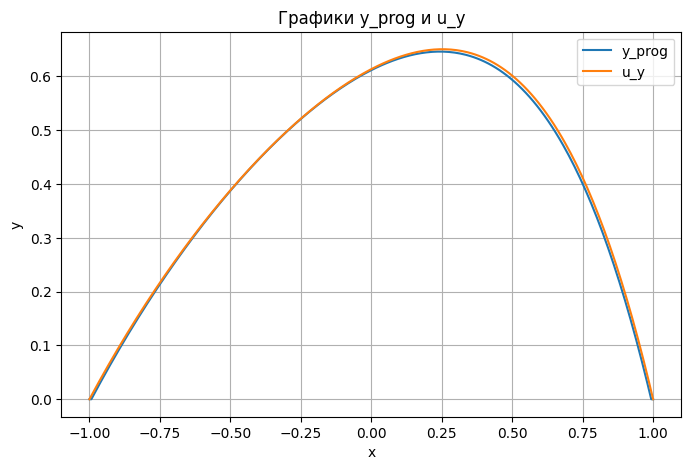

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
alpha1 = 1
alpha2 = 0
beta1 = 1
beta2 = 0
alpha = 0
beta = 0
N = 300 # Количество узлов
h = 2 / (N + 1)  # Шаг сетки
x_h = np.linspace(-1, 1, N + 2)  # Равномерная сетка

# Определение функций a(x), c(x) и f(x)
def a(x):
    return 1 / (2 + x)

def c(x):
    return np.cos(x)

def f(x):
    return 1 + x

K1 = np.zeros(N)
K2 = np.zeros(N)
K3 = np.zeros(N)
F = np.zeros(N)

for i in range(N):
    x_i = x_h[i]
    K3[i] = -1 * a(x_i - h/2)/h +  c(x_i - h/2)* h / 6
    K2[i] = (a(x_i - h/2) + a(x_i + h/2)) / h + (c(x_i - h/2) + c(x_i + h/2)) * h / 3
    K1[i] = -1  * a(x_i + h/2) / h +  c(x_i + h/2)* h / 6
    F[i] = h / 2 * (f(x_i + h/2)+f(x_i - h/2))

# Инициализация массивов alpha и beta
S = np.zeros(N)
T = np.zeros(N)

S[0] = alpha2 / (h * alpha1 + alpha2)
T[0] = alpha * h / (h * alpha1 + alpha2)

for i in range(1, N):
    S[i] = -K3[i-1] / (K2[i-1] + S[i-1] * K1[i-1])
    T[i] = -(K1[i-1] * T[i-1] - F[i-1]) / (K2[i-1] + S[i-1] * K1[i-1])


# Инициализация массива u_prog
u_prog = np.zeros(N)


u_prog[N-1] = (beta2 * T[N-1] + h * beta) / (h * beta1 + beta2 - beta2 * S[N-1])  # Заданное граничное условие
for i in range(N-2, -1, -1):
    u_prog[i] = S[i] * u_prog[i+1] + T[i]

# Вычисление u_y методом итераций
u_y_new = np.zeros(N)
sigma = 1e-5
err = np.inf
iter = 0

while err > sigma:
    u_y_prev = np.copy(u_y_new)
    u_y_new[0] = (F[0] - K3[0] * u_y_prev[1]) / K2[0]
    for i in range(1, N - 1):
      u_y_new[i] = (F[i] - K3[i] * u_y_prev[i + 1] - K1[i] * u_y_prev[i - 1]) / K2[i]
    u_y_new[N - 1] = (F[N - 1] - K1[N - 1] * u_y_prev[N - 2]) / K2[N - 1]
    err = np.linalg.norm(u_y_new - u_y_prev)
    iter += 1

print(iter)

u_y = np.zeros(N + 2)
y_prog = np.zeros(N + 2)

for i in range(N):
    u_y[i + 1] = u_y_new[i]
    y_prog[i + 1] = u_prog[i]
# Построение графиков
plt.figure(figsize=(8, 5))
plt.plot(x_h, y_prog, label='y_prog')
plt.plot(x_h, u_y, label='u_y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики y_prog и u_y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Values of interest
x_values = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8]

# Initialize a table to store the results
table = []

# Find the values at specified points
for x_value in x_values:
    index_x = np.argmin(np.abs(x_h - x_value))
    u_value = u_y[index_x]
    K1_value = K1[index_x]
    K2_value = K2[index_x]
    K3_value = K3[index_x]
    F_value = F[index_x]

    # Append the results to the table
    table.append([x_value, u_value, K1_value, K2_value, K3_value, F_value])

# Convert the table to a DataFrame
df = pd.DataFrame(table, columns=["x", "u", "K1", "K2", "K3", "F"])

# Display the DataFrame
df

,x,u,K1,K2,K3,F
0,-0.8,0.176687,-125.138729,250.977309,-125.833954,0.001324
1,-0.6,0.323443,-107.346241,215.209142,-107.857422,0.002649
2,-0.4,0.444878,-93.983419,188.364558,-94.375024,0.003973
3,-0.2,0.542087,-83.579173,167.474412,-83.888731,0.005298
4,0.0,0.612409,-75.248893,150.755263,-75.499726,0.006622
5,0.2,0.648687,-68.222561,136.657742,-68.428673,0.007991
6,0.4,0.633642,-62.568734,125.316903,-62.742054,0.009316
7,0.6,0.545419,-57.780339,115.713931,-57.928113,0.010640
8,0.8,0.349475,-53.672810,107.477731,-53.800295,0.011965
